## Step 1: Import Libraries
Before starting, we need to import the necessary libraries for data manipulation, visualization, and model building. We will use numpy, matplotlib, scikit learn and tenserflow.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## Step 2: Load and Explore the Dataset
We will load the dataset and inspect its structure to understand the features and labels. You can download this dataset from here.

The dataset contains 42,000 rows where each row represents an image.
The first column (label) indicates the digit (0-9) and the remaining columns represent pixel values of the image.
We separate these into X (pixel values) and y (labels).
X has 42,000 samples with 784 features (28x28 pixels) and y has 42,000 labels.

In [14]:
train_data = pd.read_csv('/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)


## Step 3: Preprocess the Data
Raw data often needs cleaning and formatting before it can be fed into a neural network. Let’s preprocess the data to make it ready for training.

First we ensure X is in the correct format (Pandas DataFrame).
Then we convert all pixel values to numeric format and replace any missing values with 0.
Next we normalize the pixel values to the range [0, 1] by dividing them by 255.0. This helps the model learn faster.
Finally we reshape the data to include a channel dimension making it compatible with neural networks.

In [15]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


## Step 4: One-Hot Encode the Labels
Neural networks work best when labels are in a specific format called "one-hot encoding." Let’s convert our labels into this format.

In [16]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


## Step 5: Split the Data
To evaluate our model effectively we need to split the data into a training set and a validation set. Here we will use 80% data for training rest for testing.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


## Step 6: Build the Neural Network Model
Now let’s define the architecture of our neural network. We define a simple feedforward neural network with three layers:

A Flatten layer converts the 28x28 image into a single vector of length 784.
Two hidden layers with 128 and 64 neurons use the ReLU activation function to introduce non-linearity.
An output layer with 10 neurons uses the softmax activation function to predict probabilities for each digit (0-9).
We compile the model with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

In [18]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Step 7: Train the Model
With the model defined it’s time to train it on the training data. The model trains for 10 iterations (epochs) over the entire training dataset. During training it processes the data in batches of 32 samples for efficiency.

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8416 - loss: 0.5470 - val_accuracy: 0.9508 - val_loss: 0.1653
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9617 - loss: 0.1269 - val_accuracy: 0.9586 - val_loss: 0.1353
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9742 - loss: 0.0844 - val_accuracy: 0.9658 - val_loss: 0.1062
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9796 - loss: 0.0634 - val_accuracy: 0.9652 - val_loss: 0.1184
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9857 - loss: 0.0440 - val_accuracy: 0.9661 - val_loss: 0.1134
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9701 - val_loss: 0.1035
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9918 - loss: 0.0274 - val_accuracy: 0.9698 - val_loss: 0.1088
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9925 - loss: 0.0224 - 

## Step 8: Evaluate the Model
Once training is complete we evaluate the model’s performance on the validation set and plot the training and validation accuracy to see how well the model learned over time. This helps us identify issues like overfitting.

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1350
Validation Accuracy: 96.81%


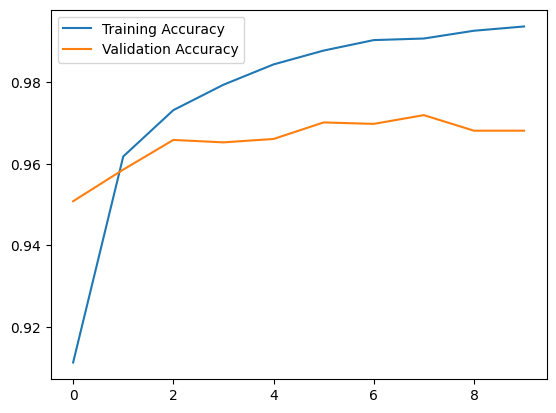

In [20]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Step 9: Make Predictions
Let’s use the trained model to make predictions on new data. We load the test data preprocess it similarly to the training data and feed it into the model to get predictions.

### Try 9

In [32]:
import cv2
import pandas as pd

# Load the image
image = cv2.imread("/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test9.png", cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (28, 28))
# Flatten the image into a single row
csv_row = resized_image.flatten()

# Save to CSV
df = pd.DataFrame([csv_row])
df.to_csv(r"/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test9.csv", index=False)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


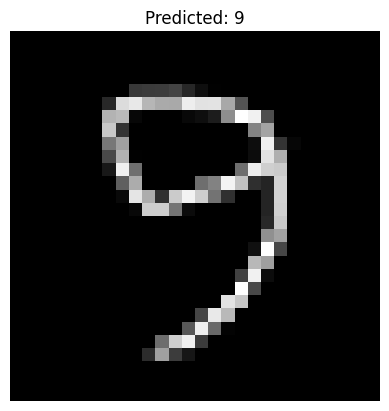

In [42]:
test_data = pd.read_csv('/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test9.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Iterate up to the number of samples in X_test
for i in range(X_test.shape[0]):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

### Try 4

In [45]:
import cv2
import pandas as pd

# Load the image
image = cv2.imread("/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test4.png", cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (28, 28))
# Flatten the image into a single row
csv_row = resized_image.flatten()

# Save to CSV
df = pd.DataFrame([csv_row])
df.to_csv(r"/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test4.csv", index=False)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


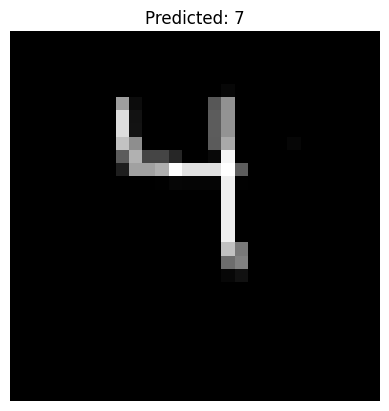

In [46]:
test_data = pd.read_csv('/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test4.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Iterate up to the number of samples in X_test
for i in range(X_test.shape[0]):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

### Try 5

In [49]:
import cv2
import pandas as pd

# Load the image
image = cv2.imread("/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test5.png", cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (28, 28))
# Flatten the image into a single row
csv_row = resized_image.flatten()

# Save to CSV
df = pd.DataFrame([csv_row])
df.to_csv(r"/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test5.csv", index=False)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


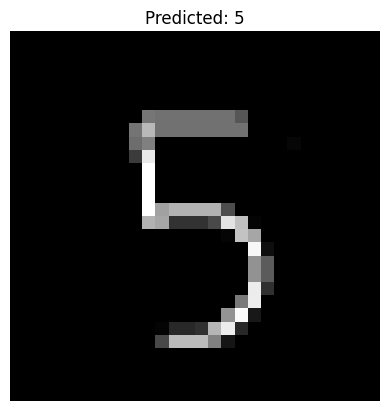

In [50]:
test_data = pd.read_csv('/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test5.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Iterate up to the number of samples in X_test
for i in range(X_test.shape[0]):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

### Try 6

In [51]:
import cv2
import pandas as pd

# Load the image
image = cv2.imread("/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test6.png", cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (28, 28))
# Flatten the image into a single row
csv_row = resized_image.flatten()

# Save to CSV
df = pd.DataFrame([csv_row])
df.to_csv(r"/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test6.csv", index=False)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


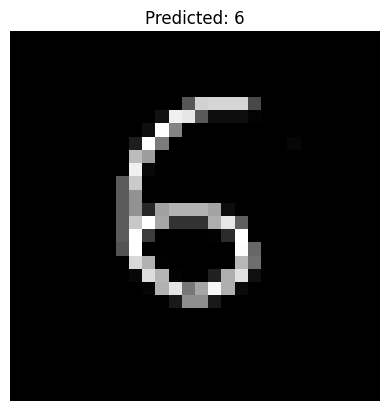

In [52]:
test_data = pd.read_csv('/content/drive/MyDrive/My Projects/Handwritten Digit Recognition/test6.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Iterate up to the number of samples in X_test
for i in range(X_test.shape[0]):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()